In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Import data
Read the data from csv file

In [3]:
all_df = pd.read_csv('crimes.csv')
all_df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3753774,HK769786,11/23/2004 10:15:00 PM,029XX S STATE ST,2024,NARCOTICS,POSS: HEROIN(WHITE),CHA PARKING LOT/GROUNDS,True,False,...,3.0,35.0,18,1176755.0,1885570.0,2004,04/15/2016 08:55:02 AM,41.841350,-87.626861,"(41.841350479, -87.626860911)"
1,3753775,HL121290,01/12/2005 08:15:00 PM,111XX S STATE ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,34.0,49.0,26,1178229.0,1831287.0,2005,04/15/2016 08:55:02 AM,41.692359,-87.623097,"(41.692358646, -87.623096746)"
2,3753776,HL122737,01/13/2005 02:45:00 PM,104XX S WALLACE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,34.0,49.0,14,1174150.0,1835631.0,2005,04/15/2016 08:55:02 AM,41.704371,-87.637902,"(41.704370559, -87.637902149)"
3,3753777,HL121030,01/12/2005 05:35:00 PM,037XX W ALTGELD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,35.0,22.0,08B,1151164.0,1916359.0,2005,04/15/2016 08:55:02 AM,41.926378,-87.719964,"(41.926378017, -87.719963957)"
4,3753781,HK756758,11/17/2004 04:45:00 PM,002XX S ALBANY AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,28.0,27.0,18,1155752.0,1898738.0,2004,04/15/2016 08:55:02 AM,41.877933,-87.703580,"(41.877933128, -87.703580435)"
5,3753784,HK774022,11/26/2004 02:45:00 PM,015XX W 13TH ST,2024,NARCOTICS,POSS: HEROIN(WHITE),CHA PARKING LOT/GROUNDS,True,False,...,2.0,28.0,18,1166406.0,1894142.0,2004,04/15/2016 08:55:02 AM,41.865100,-87.664593,"(41.865100146, -87.664593068)"
6,3753785,HL120239,01/12/2005 09:30:00 AM,023XX W 71ST ST,0920,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,STREET,False,False,...,18.0,66.0,07,1162129.0,1857532.0,2005,04/15/2016 08:55:02 AM,41.764728,-87.681314,"(41.764728311, -87.681313755)"
7,3753786,HL122544,01/12/2005 01:27:00 PM,011XX N CLARK ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,False,...,42.0,8.0,26,1175334.0,1907851.0,2005,04/15/2016 08:55:02 AM,41.902523,-87.631407,"(41.902522915, -87.63140683)"
8,3753787,HL121369,01/12/2005 07:30:00 PM,004XX E 79TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,6.0,44.0,07,1180739.0,1852731.0,2005,04/15/2016 08:55:02 AM,41.751146,-87.613251,"(41.751146498, -87.613250611)"
9,3753789,HL123269,01/13/2005 07:05:00 PM,126XX S HALSTED ST,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,34.0,53.0,06,1173297.0,1821020.0,2005,04/15/2016 08:55:02 AM,41.664295,-87.641455,"(41.664294511, -87.641455374)"


In [4]:
from sklearn.model_selection import train_test_split

small_df, big_df = train_test_split(all_df, test_size=0.95)

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(small_df, test_size=0.4)

In [6]:
len(train_df)

193393

## Feature selection
### 1) First round of dropping attributes
* **Primary Type** will be the dependent variable - y, *DO NOT drop first until we finish our data analysis*
* **ID** and **Case Number** are just a unique number, does not make sense to have them in prediction *Keep ID first until we finish our data analysis*
* **Illinois Uniform Crime Reporting (IUCR)** codes are four digit codes that use to classify criminal incidents when taking individual reports. According to source http://www.isp.state.il.us/docs/6-260.pdf, a good example is 310, 320, 325, 326 and 330 are belong to Robbery Type. If we are going to predict criminal type. It is impossible for us to know IUCR ahead.
* Both **Description** and **Primary type** are directly linked to IUCR. Without knowing IURC and primary type, it does not make sense to keep description column
* Drop **Block** column, partial redacted address is not meaningful at all
* Drop **FBI Code**, same reason as IUCR
* Drop **Updated On**, does not influce the criminal type 
* Drop **Latitude**, **Longitude**, **X Coordinate**, **Y Coordinate**  and **Location**. Precise location does not provide much insight. **District**, **Beat**, **Community**, and **Ward** have provide sufficient knowledge for geographical area of crime cases
* Drop **Year**, year does not make sense if we are going to predict the future case.
   
    

In [32]:
def first_drop_attributes(df):    
    df = df.drop([ "Case Number", "IUCR", "Description", "Block", "FBI Code", "Updated On", "Latitude", "Longitude", "Location", "X Coordinate", "Y Coordinate", "Year"], axis=1)
    df.loc[:, "Primary Type"] = pd.Categorical(df['Primary Type'])
    df.loc[:, "Location Description"] = pd.Categorical(df['Location Description'])
    df.loc[:, "Arrest"] = pd.Categorical(df['Arrest'])
    df.loc[:, "Domestic"] = pd.Categorical(df['Domestic'])
    #df.loc[:, "Beat"] = pd.Categorical(df['Beat'])
    #df.loc[:, "District"] = pd.Categorical(df['District'])
    #df.loc[:, "Ward"] = pd.Categorical(df['Ward'])
    #df.loc[:, "Community Area"] = pd.Categorical(df['Community Area'])
    loc_to_change  = list(df['Location Description'].value_counts()[20:].index)
    df.loc[df['Location Description'].isin(loc_to_change) , df.columns=='Location Description'] = 'OTHER'
    return df

train_x = first_drop_attributes(train_df)

print(train_x.dtypes)
train_x.head()

ValueError: labels ['Case Number' 'IUCR' 'Description' 'Block' 'FBI Code' 'Updated On'
 'Latitude' 'Longitude' 'Location' 'X Coordinate' 'Y Coordinate' 'Year'] not contained in axis

We would like to know the ratio of primary type in this dataset. It shows theft and battery are the most common types

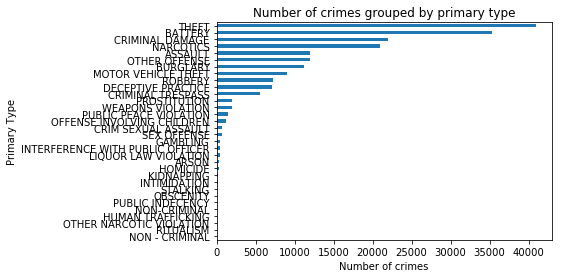

In [8]:
train_x.groupby([train_x["Primary Type"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Primary Type')
plt.xlabel('Number of crimes')
plt.title('Number of crimes grouped by primary type')
plt.rc('figure', figsize=(20, 20))
plt.show()

### 2) Converting Date to month, day and time period
* From date column, derive months, days(Mon-Sun) and time period
* Time period can be categorized as Morning (6AM to 12:00PM), Afternoon (12:01PM to 5:00PM), Evening (5:01 PM to 8:00PM) and Night (8:01PM to 5:59PM)

In [9]:
def datetime_to_period(row):
    date = row["Date_o"]
    period = "None"
    if 6 <= date.hour < 12 :
        period = "MORNING"
    elif 12 <= date.hour < 17:
        period = "AFTERNOON"
    elif 17 <= date.hour < 20:
        period = "EVENING"
    else:
        period = "NIGHT"
    return period
def second_date_extraction(df):
    df.loc[:, "Date_o"] = pd.to_datetime(df["Date"], format='%m/%d/%Y %H:%M:%S %p')
    df.loc[:, "Day Of Week"] = df["Date_o"].dt.weekday_name
    df["Time Period"] = df.apply (lambda row: datetime_to_period(row),axis=1)
    
    df.loc[:, "Day Of Week"] = pd.Categorical(df['Day Of Week'])
    df.loc[:, "Time Period"] = pd.Categorical(df['Time Period'])
    return df

train_x = second_date_extraction(train_x)
train_x.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Date_o,Day Of Week,Time Period
1455055,5594304,06/12/2007 02:00:00 PM,CRIMINAL TRESPASS,OTHER,True,False,2133,2.0,5.0,41.0,2007-06-12 02:00:00,Tuesday,NIGHT
901418,11101283,09/27/2017 12:05:00 PM,NARCOTICS,RESIDENCE PORCH/HALLWAY,True,False,213,2.0,3.0,35.0,2017-09-27 12:05:00,Wednesday,AFTERNOON
5833008,2952938,09/19/2003 05:30:00 PM,THEFT,STREET,False,False,1211,12.0,2.0,28.0,2003-09-19 05:30:00,Friday,NIGHT
6224322,3443851,07/21/2004 09:00:00 AM,CRIMINAL TRESPASS,OTHER,True,False,1024,10.0,22.0,30.0,2004-07-21 09:00:00,Wednesday,MORNING
2552991,7206231,11/01/2009 08:20:00 PM,THEFT,OTHER,True,False,2111,9.0,25.0,34.0,2009-11-01 08:20:00,Sunday,MORNING


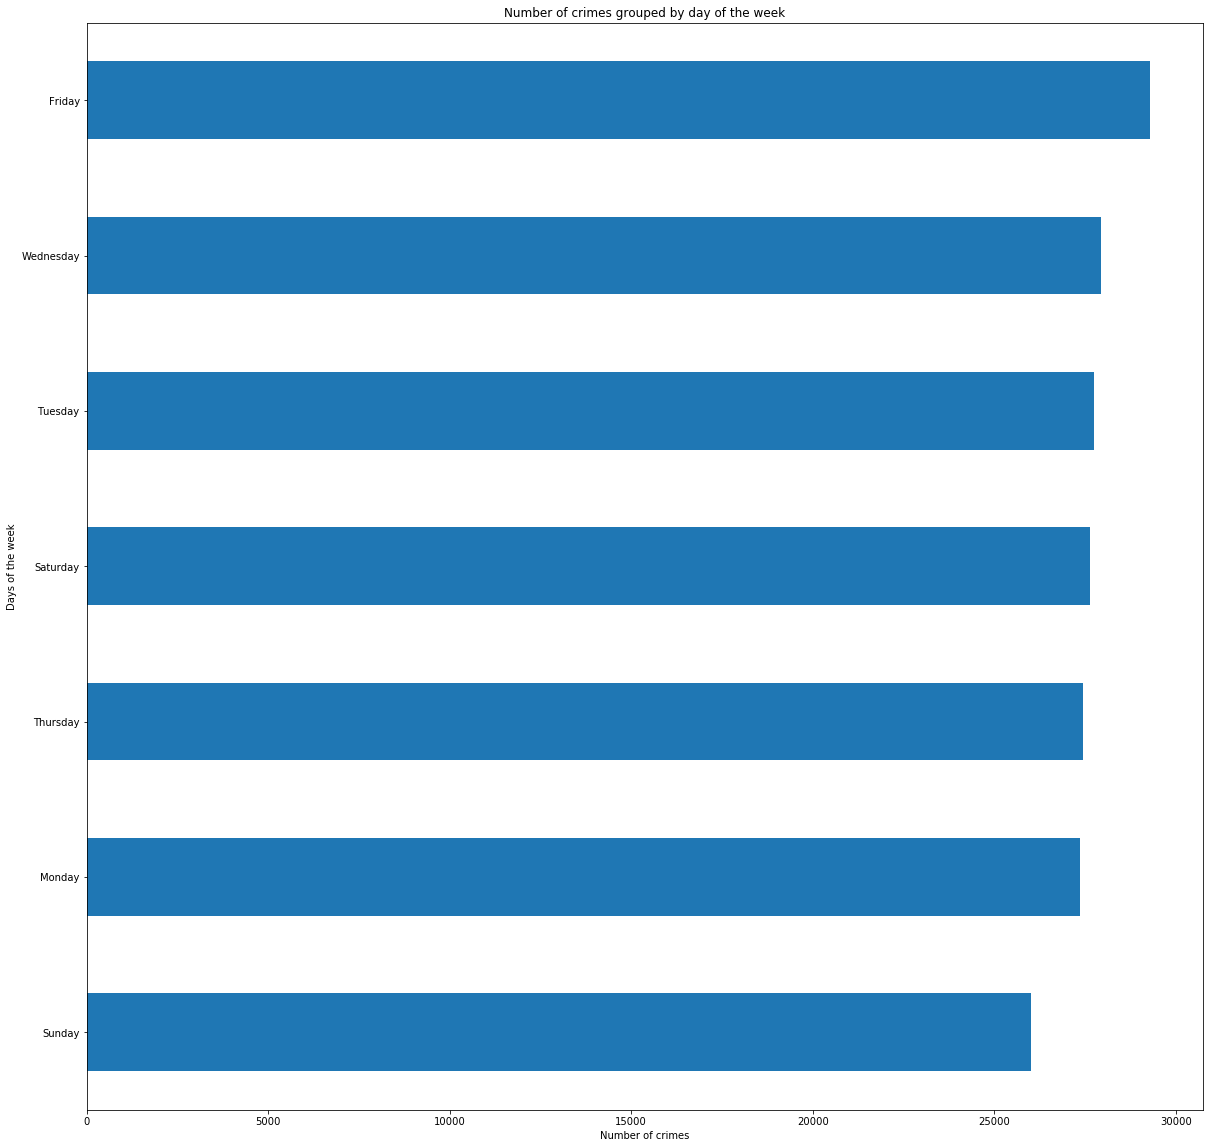

In [10]:
train_x.groupby([train_x["Day Of Week"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Days of the week')
plt.xlabel('Number of crimes')
plt.title('Number of crimes grouped by day of the week')
plt.rc('figure', figsize=(7, 7))
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    ax = plt.gca()
    ax.set_xticklabels(df.columns)
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

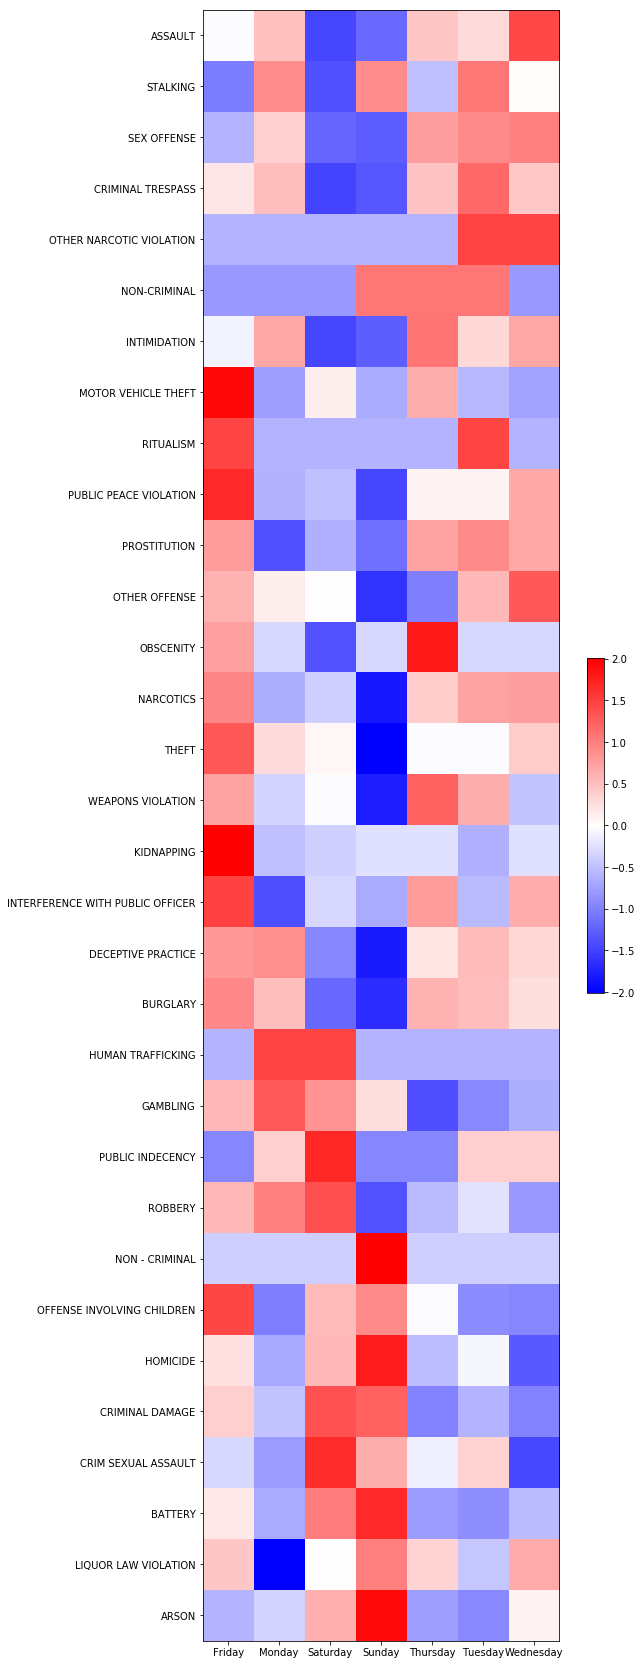

In [12]:
plt.figure(figsize=(10,30))
scale_and_plot(train_x.pivot_table(values="ID", index='Primary Type', columns='Day Of Week', aggfunc=np.size).fillna(0))

In [13]:
plt.figure(figsize=(5,30))
scale_and_plot(train_x.pivot_table(values="ID", index='Primary Type', columns='Time Period', aggfunc=np.size).fillna(0))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure(figsize=(30,50))
scale_and_plot(train_x.pivot_table(values="ID", index='Primary Type', columns='Location Description', aggfunc=np.size).fillna(0))

In [ ]:
train_x.describe(include = ['category'])
train_x.dropna(axis=1, how='all')
train_x.isnull().sum()

In [39]:
def one_hot_encoder(df):
    return pd.get_dummies(df, columns=["Arrest", "Domestic", "Location Description", "Day Of Week", "Time Period", "District"])
train_x = one_hot_encoder(train_x)

In [18]:
train_x.describe(include=["category"])

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Day Of Week,Time Period
count,193393,193303,193393,193393,193393,193393.0,174819.0,174775.0,193393,193393
unique,32,20,2,2,303,23.0,50.0,78.0,7,3
top,THEFT,STREET,False,False,423,8.0,28.0,25.0,Friday,MORNING
freq,40903,51057,138887,168476,1501,13140.0,8089.0,11207.0,29275,101725


In [19]:
def createXY(df_x):
    df_y = df_x["Primary Type"]
    df_x = df_x.drop(["Primary Type", "ID", "Date_o", "Date"], axis=1)
    return df_x, df_y
train_x, train_y = createXY(train_x)    



In [36]:
small_df_c = small_df.copy()
small_df_c = small_df_c.drop(["Community Area", "Ward", "Beat"], axis=1)

small_df_c = small_df_c.dropna(axis=1, how='all')
small_df_c = first_drop_attributes(small_df_c)
small_df_c = second_date_extraction(small_df_c)
small_df_c = one_hot_encoder(small_df_c)

train_df, test_df = train_test_split(small_df_c, test_size=0.4)


train_x, train_y = createXY(train_df) 


test_x, test_y = createXY(test_df) 


In [37]:
print(len(train_x), len(train_y), len(test_x), len(test_y))
print(test_x.columns, train_x.columns)

193393 193393 128929 128929
Index(['Arrest_False', 'Arrest_True', 'Domestic_False', 'Domestic_True',
       'Location Description_ABANDONED BUILDING',
       'Location Description_AIRCRAFT',
       'Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
       'Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
       'Location Description_AIRPORT EXTERIOR - NON-SECURE AREA',
       'Location Description_AIRPORT EXTERIOR - SECURE AREA',
       ...
       'District_15.0', 'District_16.0', 'District_17.0', 'District_18.0',
       'District_19.0', 'District_20.0', 'District_22.0', 'District_24.0',
       'District_25.0', 'District_31.0'],
      dtype='object', length=162) Index(['Arrest_False', 'Arrest_True', 'Domestic_False', 'Domestic_True',
       'Location Description_ABANDONED BUILDING',
       'Location Description_AIRCRAFT',
       'Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
       'Location Description_AIRPORT BUILDING NO

In [38]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

41.82